In [ ]:
#Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, 
#such as the Titanic dataset from Kaggle. Explore the relationships between variables 
#and identify patterns and trends in the data.

In [100]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

In [101]:
df = sns.load_dataset("titanic")

In [102]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [103]:
# redundancy data are removed([sex,who],[alive.survived],[sibsp,alone],[embark,embark_town])
df = df[["survived","sex","age","fare","class","embark_town","alone"]]

In [104]:
df

,survived,sex,age,fare,class,embark_town,alone
0,0,male,22.0,7.2500,Third,Southampton,False
1,1,female,38.0,71.2833,First,Cherbourg,False
2,1,female,26.0,7.9250,Third,Southampton,True
3,1,female,35.0,53.1000,First,Southampton,False
4,0,male,35.0,8.0500,Third,Southampton,True
...,...,...,...,...,...,...,...
886,0,male,27.0,13.0000,Second,Southampton,True
887,1,female,19.0,30.0000,First,Southampton,True
888,0,female,NaN,23.4500,Third,Southampton,False
889,1,male,26.0,30.0000,First,Cherbourg,True


In [105]:
# checking for missing values
df.isnull().sum()

survived         0
sex              0
age            177
fare             0
class            0
embark_town      2
alone            0
dtype: int64

In [106]:
df["embark_town"].mode()

0    Southampton
Name: embark_town, dtype: object

In [107]:
# mode imputation for missing values for embark_town

df["embark_town"].fillna(df["embark_town"].mode()[0],inplace = True)

In [108]:
# median imputation for missing values for age

df["age"].fillna(df["age"].median(),inplace = True)

In [109]:
df.isnull().sum()

survived       0
sex            0
age            0
fare           0
class          0
embark_town    0
alone          0
dtype: int64

In [110]:
#checked for wrong labels/observations but all have relevant names

In [111]:
#Identifying Outliers

<Axes: xlabel='fare'>

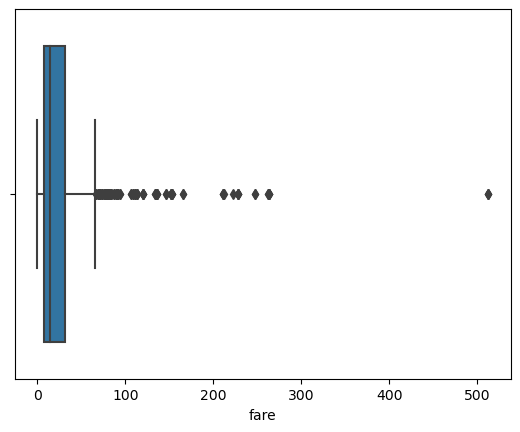

In [112]:
sns.boxplot(x = df["fare"])

In [113]:
df["fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

<Axes: xlabel='age'>

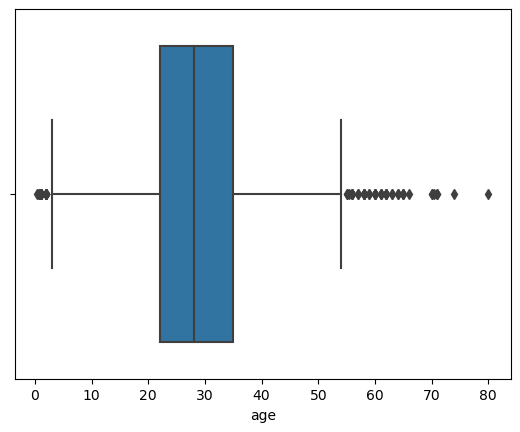

In [114]:
sns.boxplot(x = df["age"])

In [115]:
df["age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: age, dtype: float64

In [116]:
# observed outliers in fare and age

In [117]:
# treatment for outliers

In [118]:
# technique - winsorization technique

In [119]:
# fare IQR(LL - lower limit, UL = Upper limit)
Q3 = df["fare"].quantile(0.75)
Q1 = df["fare"].quantile(0.25)
IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
print(LL,UL)

-26.724 65.6344


In [120]:
outlier_data = df[df["fare"]>65.6344]
outlier_data

,survived,sex,age,fare,class,embark_town,alone
1,1,female,38.0,71.2833,First,Cherbourg,False
27,0,male,19.0,263.0000,First,Southampton,False
31,1,female,28.0,146.5208,First,Cherbourg,False
34,0,male,28.0,82.1708,First,Cherbourg,False
52,1,female,49.0,76.7292,First,Cherbourg,False
...,...,...,...,...,...,...,...
846,0,male,28.0,69.5500,Third,Southampton,False
849,1,female,28.0,89.1042,First,Cherbourg,False
856,1,female,45.0,164.8667,First,Southampton,False
863,0,female,28.0,69.5500,Third,Southampton,False


In [121]:
outlier_data["fare"].describe()

count    116.000000
mean     128.291629
std       84.636908
min       66.600000
25%       78.189600
50%       90.000000
75%      147.778100
max      512.329200
Name: fare, dtype: float64

In [122]:
# age IQR(LL - lower limit, UL = Upper limit)
Q3_age = df["age"].quantile(0.75)
Q1_age = df["age"].quantile(0.25)
IQR_age = Q3_age-Q1_age
UL_age = Q3_age + 1.5*IQR_age
LL_age = Q1_age - 1.5*IQR_age
print(LL_age,UL_age)

2.5 54.5


In [123]:
outlier_data_age_LL = df[df["age"]<2.5]
outlier_data_age_UL = df[df["age"]>54.5]
print(outlier_data_age_LL,outlier_data_age_UL)

     survived     sex   age      fare   class  embark_town  alone
7           0    male  2.00   21.0750   Third  Southampton  False
16          0    male  2.00   29.1250   Third   Queenstown  False
78          1    male  0.83   29.0000  Second  Southampton  False
119         0  female  2.00   31.2750   Third  Southampton  False
164         0    male  1.00   39.6875   Third  Southampton  False
172         1  female  1.00   11.1333   Third  Southampton  False
183         1    male  1.00   39.0000  Second  Southampton  False
205         0  female  2.00   10.4625   Third  Southampton  False
297         0  female  2.00  151.5500   First  Southampton  False
305         1    male  0.92  151.5500   First  Southampton  False
340         1    male  2.00   26.0000  Second  Southampton  False
381         1  female  1.00   15.7417   Third    Cherbourg  False
386         0    male  1.00   46.9000   Third  Southampton  False
469         1  female  0.75   19.2583   Third    Cherbourg  False
479       

In [124]:
# winsorization for fare

UL

65.6344

In [125]:
# fill the outliers with upper and lower limit
row_index = df["fare"].index 
for i in row_index:
    if df.loc[i,"fare"] > UL:
        df.loc[i,"fare"] = UL
    elif df.loc[i,"fare"] < LL:
        df.loc[i,"fare"] = LL

<Axes: xlabel='fare'>

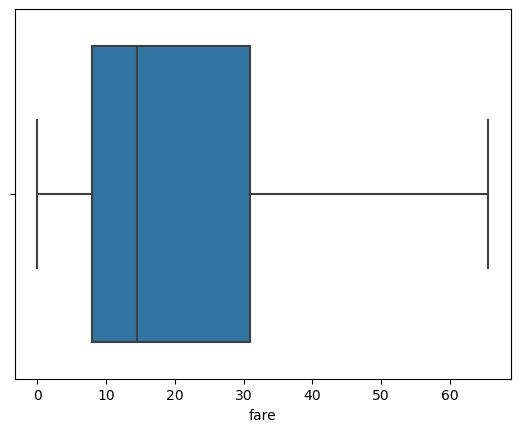

In [126]:
sns.boxplot(x = df["fare"])

In [128]:
df["fare"].describe()

count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: fare, dtype: float64

In [129]:
# winsorization on age

In [130]:
UL_age

54.5

In [131]:
LL_age

2.5

In [132]:
row_index = df["age"].index
for i in row_index:
    if df.loc[i,"age"] > UL_age:
        df.loc[i,"age"] = UL_age
    elif df.loc[i,"age"] < LL_age:
        df.loc[i,"age"]  = LL_age

<Axes: xlabel='age'>

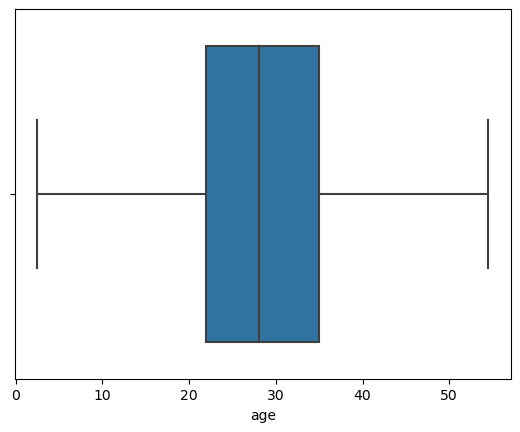

In [133]:
sns.boxplot(x=df["age"])

In [134]:
df["age"].describe()

count    891.000000
mean      29.039282
std       12.072074
min        2.500000
25%       22.000000
50%       28.000000
75%       35.000000
max       54.500000
Name: age, dtype: float64

In [135]:
outlier_data_age_LL["age"].describe()

count    24.000000
mean      1.340417
std       0.584335
min       0.420000
25%       0.897500
50%       1.000000
75%       2.000000
max       2.000000
Name: age, dtype: float64

In [136]:
outlier_data_age_UL["age"].describe()

count    42.000000
mean     62.000000
std       5.705154
min      55.000000
25%      58.000000
50%      61.000000
75%      64.750000
max      80.000000
Name: age, dtype: float64

In [137]:
df

,survived,sex,age,fare,class,embark_town,alone
0,0,male,22.0,7.2500,Third,Southampton,False
1,1,female,38.0,65.6344,First,Cherbourg,False
2,1,female,26.0,7.9250,Third,Southampton,True
3,1,female,35.0,53.1000,First,Southampton,False
4,0,male,35.0,8.0500,Third,Southampton,True
...,...,...,...,...,...,...,...
886,0,male,27.0,13.0000,Second,Southampton,True
887,1,female,19.0,30.0000,First,Southampton,True
888,0,female,28.0,23.4500,Third,Southampton,False
889,1,male,26.0,30.0000,First,Cherbourg,True


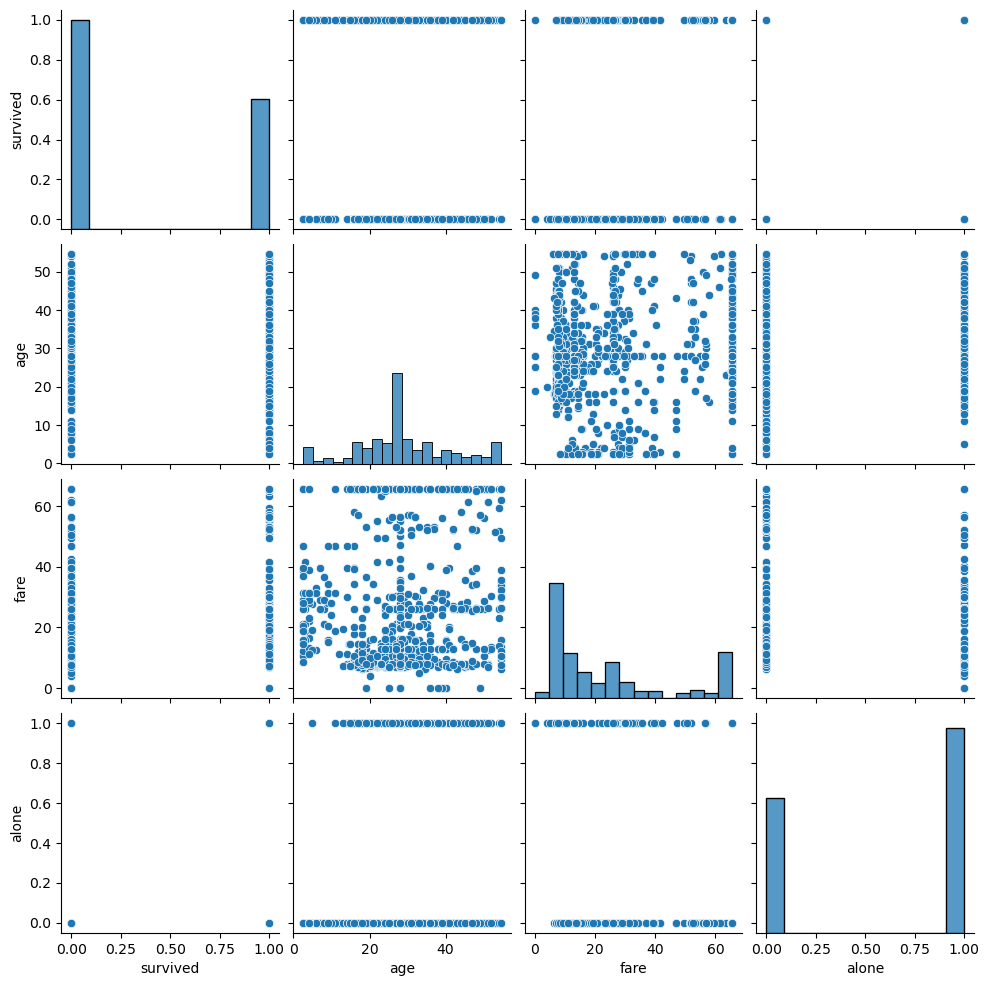

In [138]:
#pair plot

sns.pairplot(df)

<Axes: xlabel='age', ylabel='Density'>

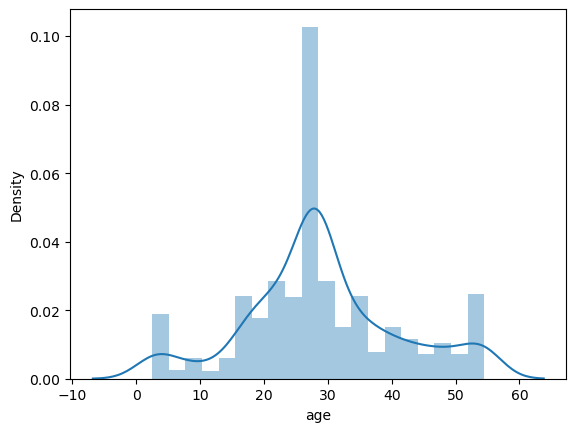

In [139]:
# Age Distribution

sns.distplot(df["age"])

<Axes: xlabel='fare', ylabel='Density'>

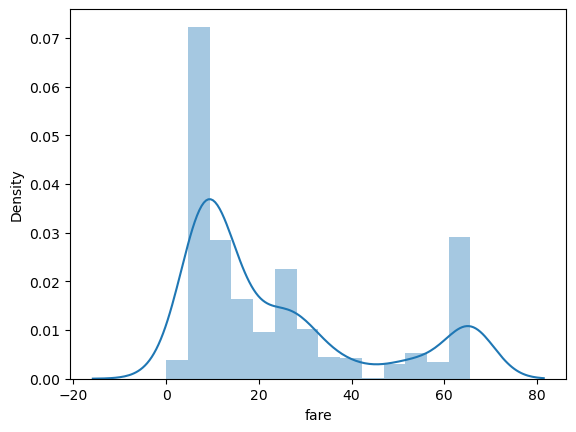

In [140]:
# fare distribution
sns.distplot(df["fare"])

<Axes: xlabel='survived', ylabel='count'>

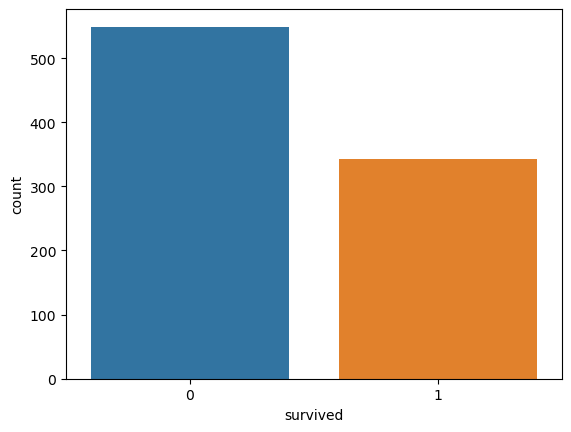

In [141]:
# Survival rate

sns.countplot(x =df["survived"])

<Axes: xlabel='sex', ylabel='count'>

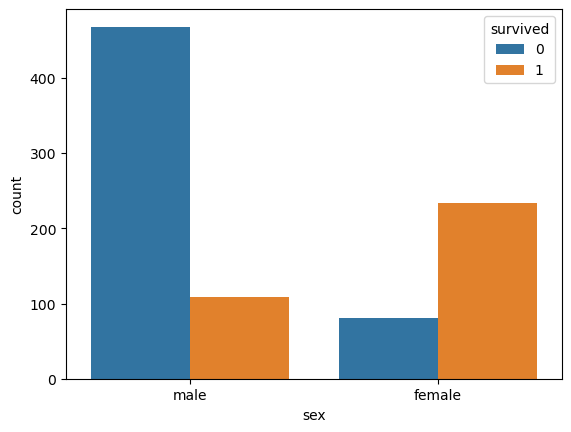

In [142]:
#survival by gender
sns.countplot(x = df["sex"],hue=df["survived"])

<Axes: xlabel='class', ylabel='count'>

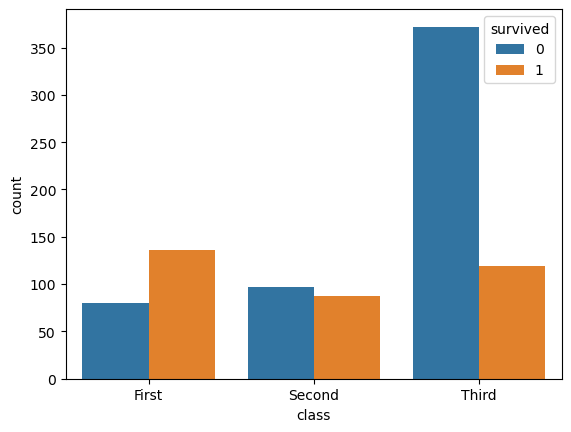

In [143]:
# survived by calss
df.groupby("class")[["survived"]].count()

sns.countplot(x = df["class"],hue = df["survived"])

<Axes: xlabel='class', ylabel='count'>

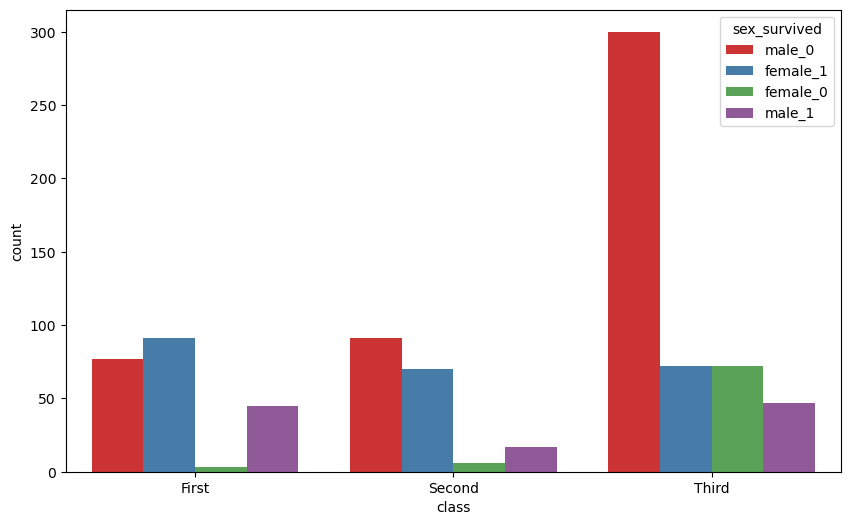

In [144]:
#survived by class with respect to gender
df['sex_survived'] = df['sex'] + '_'+ df['survived'].astype(str)

plt.figure(figsize=(10, 6))
sns.countplot(x='class', hue='sex_survived', data=df, palette="Set1")

In [145]:
df.head()

,survived,sex,age,fare,class,embark_town,alone,sex_survived
0,0,male,22.0,7.2500,Third,Southampton,False,male_0
1,1,female,38.0,65.6344,First,Cherbourg,False,female_1
2,1,female,26.0,7.9250,Third,Southampton,True,female_1
3,1,female,35.0,53.1000,First,Southampton,False,female_1
4,0,male,35.0,8.0500,Third,Southampton,True,male_0
